## Side Effects Word Cloud

In [21]:
import pandas as pd
import numpy as np

from PIL import Image

In [2]:
df_webmd = pd.read_csv('webmd_v07_final_dataset.csv')
df_druglib = pd.read_csv('druglib_v07_final_dataset.csv')

In [3]:
df_webmd

,Drug,Condition,Rating,Date,Age,Sex,Reviews,Side_Effects,Website
0,advate vial,hemophilia a,10,11/11/2009,19-24,male,,"flushing of the face, headache , nausea , an...",webmd
1,ed a-hist,cold symptoms,10,2/25/2014,55-64,male,i have found that this med is the easiest and ...,"drowsiness, dizziness , dry mouth /nose/thro...",webmd
2,ed a-hist,cold symptoms,10,2/16/2013,65-74,male,have only been using medication 2 days & am no...,"drowsiness, dizziness , dry mouth /nose/thro...",webmd
3,ed a-hist,cold symptoms,3,2/9/2012,45-54,male,this is widely prescribed bu useless,"drowsiness, dizziness , dry mouth /nose/thro...",webmd
4,chlo hist,cold symptoms,10,2/18/2017,65-74,female,i tried all the over the counter cold remedies...,"drowsiness, dizziness , blurred vision , na...",webmd
...,...,...,...,...,...,...,...,...,...
206894,isoniazid,tuberculosis,2,11/26/2007,45-54,female,i am having some of these side effects and wil...,nausea / vomiting or stomach upset may occur.,webmd
206895,isoniazid,tuberculosis,2,11/24/2007,45-54,female,"made me tired,achy,and was told not to take st...",nausea / vomiting or stomach upset may occur.,webmd
206896,isoniazid,tuberculosis,3,10/31/2007,13-18,male,it makes me feel like crap after i take it.\ni...,nausea / vomiting or stomach upset may occur.,webmd
206897,isoniazid,tuberculosis,2,10/29/2007,25-34,female,when i strated taking the medication i was fin...,nausea / vomiting or stomach upset may occur.,webmd


In [4]:
df_webmd = df_webmd[['Drug', 'Condition', 'Rating', 'Age', 'Sex', 'Reviews', 'Side_Effects', 'Website']]

In [5]:
df_webmd

,Drug,Condition,Rating,Age,Sex,Reviews,Side_Effects,Website
0,advate vial,hemophilia a,10,19-24,male,,"flushing of the face, headache , nausea , an...",webmd
1,ed a-hist,cold symptoms,10,55-64,male,i have found that this med is the easiest and ...,"drowsiness, dizziness , dry mouth /nose/thro...",webmd
2,ed a-hist,cold symptoms,10,65-74,male,have only been using medication 2 days & am no...,"drowsiness, dizziness , dry mouth /nose/thro...",webmd
3,ed a-hist,cold symptoms,3,45-54,male,this is widely prescribed bu useless,"drowsiness, dizziness , dry mouth /nose/thro...",webmd
4,chlo hist,cold symptoms,10,65-74,female,i tried all the over the counter cold remedies...,"drowsiness, dizziness , blurred vision , na...",webmd
...,...,...,...,...,...,...,...,...
206894,isoniazid,tuberculosis,2,45-54,female,i am having some of these side effects and wil...,nausea / vomiting or stomach upset may occur.,webmd
206895,isoniazid,tuberculosis,2,45-54,female,"made me tired,achy,and was told not to take st...",nausea / vomiting or stomach upset may occur.,webmd
206896,isoniazid,tuberculosis,3,13-18,male,it makes me feel like crap after i take it.\ni...,nausea / vomiting or stomach upset may occur.,webmd
206897,isoniazid,tuberculosis,2,25-34,female,when i strated taking the medication i was fin...,nausea / vomiting or stomach upset may occur.,webmd


In [6]:
df_druglib

,Drug,Condition,Rating,Age,Sex,Reviews,Side_Effects,Website
0,retin-a,acne,9,25-34,female,i applied a small amount of retin-a every eve...,"peeling, dryness, sun sensitivity",druglib
1,retin-a,acne,10,19-24,female,"after washing my face with a gentle cleanser,...",very dry skin. a lot of peeling.,druglib
2,retin-a,acne,6,25-34,male,see above,see above,druglib
3,retin-a,acne,3,25-34,female,"the cream was supposed to minimize my acne, b...",side effects included:\r\n- stinging & pain\r...,druglib
4,retin-a,acne,9,55-64,female,i use once at night. because i have built up ...,peeling which can chafe the skin and interfer...,druglib
...,...,...,...,...,...,...,...,...
2625,methimazole,hyperthyroidism,5,45-54,female,first need to say drs. waned me to have thyro...,early in treatment drs. would give me a speci...,druglib
2626,methimazole,hyperthyroidism,10,35-44,male,"i saw my primary doc, and er doctor all to be...",the side effects are not seen if any because ...,druglib
2627,tapazole,hyperthyroidism,10,45-54,female,i took the tapazole daily along with atenolol...,none - i felt no different at all,druglib
2628,tapazole,hyperthyroidism,7,25-34,female,tapazole was used to lower high thyroid hormo...,none,druglib


In [7]:
website_list = [df_webmd, df_druglib]
df = pd.concat(website_list)

In [8]:
df

,Drug,Condition,Rating,Age,Sex,Reviews,Side_Effects,Website
0,advate vial,hemophilia a,10,19-24,male,,"flushing of the face, headache , nausea , an...",webmd
1,ed a-hist,cold symptoms,10,55-64,male,i have found that this med is the easiest and ...,"drowsiness, dizziness , dry mouth /nose/thro...",webmd
2,ed a-hist,cold symptoms,10,65-74,male,have only been using medication 2 days & am no...,"drowsiness, dizziness , dry mouth /nose/thro...",webmd
3,ed a-hist,cold symptoms,3,45-54,male,this is widely prescribed bu useless,"drowsiness, dizziness , dry mouth /nose/thro...",webmd
4,chlo hist,cold symptoms,10,65-74,female,i tried all the over the counter cold remedies...,"drowsiness, dizziness , blurred vision , na...",webmd
...,...,...,...,...,...,...,...,...
2625,methimazole,hyperthyroidism,5,45-54,female,first need to say drs. waned me to have thyro...,early in treatment drs. would give me a speci...,druglib
2626,methimazole,hyperthyroidism,10,35-44,male,"i saw my primary doc, and er doctor all to be...",the side effects are not seen if any because ...,druglib
2627,tapazole,hyperthyroidism,10,45-54,female,i took the tapazole daily along with atenolol...,none - i felt no different at all,druglib
2628,tapazole,hyperthyroidism,7,25-34,female,tapazole was used to lower high thyroid hormo...,none,druglib


## Getting side effects of a particular drug  

In [15]:
input_drug = 'benadryl'
drugname = df.loc[df['Drug'] == input_drug]

In [16]:
pd.set_option('display.max_colwidth', -1)

print(drugname.Side_Effects)

695       drowsiness,  dizziness ,  constipation ,  stomach  upset,  blurred vision , or  dry mouth /nose/throat may occur.                                                                            
696       drowsiness,  dizziness ,  constipation ,  stomach  upset,  blurred vision , or  dry mouth /nose/throat may occur.                                                                            
697       drowsiness,  dizziness ,  constipation ,  stomach  upset,  blurred vision , or  dry mouth /nose/throat may occur.                                                                            
698       drowsiness,  dizziness ,  constipation ,  stomach  upset,  blurred vision , or  dry mouth /nose/throat may occur.                                                                            
699       drowsiness,  dizziness ,  constipation ,  stomach  upset,  blurred vision , or  dry mouth /nose/throat may occur.                                                                            


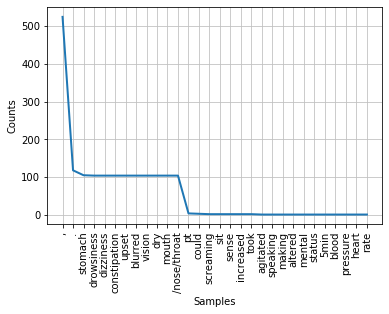

, . stomach drowsiness dizziness constipation upset blurred vision dry mouth /nose/throat pt could screaming sit sense increased took agitated speaking making altered mental status 5min blood pressure heart rate


,Word,Frequency
0,",",524
1,.,118
2,stomach,105
3,drowsiness,104
4,dizziness,104
5,constipation,104
6,upset,104
7,blurred,104
8,vision,104
9,dry,104


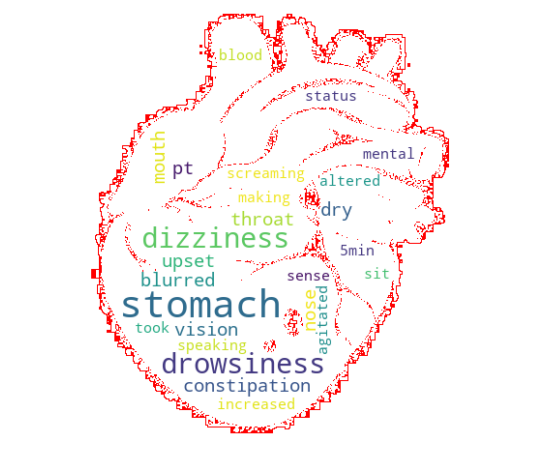

In [22]:
#Count frequency for 'All comments'
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Build frequency distance matrix
txt = drugname.Side_Effects.str.replace(r'\|', ' ').str.cat(sep=' ')
tokenized_words = nltk.tokenize.word_tokenize(txt)
stop_words = stopwords.words('english')
custom_stopwords = ['may','occur','far','drug','product','change','extremely','extreme','dose','much','really','felt','early','give','began','stop','stopped','feel','feeling','go','going','even','pill','capsule','able','along','easily','seemed','started','made','got','need','help','helped','one','two','three','put','experience','experienced','am','pm','hour','hours','hr','hrs','less','more','lot','use','around','gets','taken','medication','medicine','taking','adjusts','body','tell','still','side','effects','became','become','terrible','worse','caused','cause','problems','problem','none','n\'t','mg','mgs','amount','involved', 'Name', 'dtype', 'object', 'series', 'Word','occured','noticed','doctor','pharmacist','promptly','incident','effect','effected','affected','time','take','first','last','\'ve','every','initially','gradually','using','next','day','days','week','weeks','month','months','very','treatment','affect']
stop_words.extend(custom_stopwords)
stop_words.append(input_drug)
words = [word for word in tokenized_words if word not in stop_words]
word_dist = nltk.FreqDist(words)

# # Words with higher frequency
word_dist.plot(30,cumulative=False)
plt.show()

# The top 100 words
rslt = pd.DataFrame(word_dist.most_common(30), columns=['Word', 'Frequency'])


text = " ".join(review for review in rslt.Word)
print(text)
display(rslt)
if len(rslt) == 0:
    text = 'None'

wc_image = np.array(Image.open('./static/images/wc_mask.jpg'))
wordcloud1 = WordCloud(max_font_size=50, mask = wc_image, max_words=25, width=500,contour_width=1, contour_color='red', background_color="white").generate(text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.show()